In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import numpy as np
import pandas as pd
import tabulate

from transformers import BertModel, BertConfig, AlbertModel, AlbertConfig, XLMModel, XLMConfig, XLMRobertaModel, XLMRobertaConfig
import torch
from thop import profile

In [2]:
param_df = pd.read_csv('param.csv')

In [3]:
rows = [
    {'task': 'emotion-twitter', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.7113636363636363, 'f1': 0.719533483502628, 'rec': 0.7130790002077131, 'pre': 0.7314401535182183}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.6318181818181818, 'f1': 0.6474420815199204, 'rec': 0.6450695838814651, 'pre': 0.6665386503908185}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.6636363636363637, 'f1': 0.6743040608123556, 'rec': 0.66622954891643, 'pre': 0.6868084929629832}
    ,{'task': 'emotion-twitter', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.7090909090909091, 'f1': 0.7163995935686158, 'rec': 0.7124552724503219, 'pre': 0.7263335686503789}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.7931818181818182, 'f1': 0.7947415242182979, 'rec': 0.7949552464861871, 'pre': 0.8012906039643981}
    ,{'task': 'emotion-twitter', 'model': 'scratch_lr1e-4_l4', 'acc': 0.5659090909090909, 'f1': 0.5731232090390559, 'rec': 0.5736323824690162, 'pre': 0.5741610373753231}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.7477272727272727, 'f1': 0.7547546749236123, 'rec': 0.7489113324794018, 'pre': 0.7667721541116037}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.6772727272727272, 'f1': 0.6846927985145632, 'rec': 0.6812974624385516, 'pre': 0.694475020081571}
    ,{'task': 'emotion-twitter', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.6477272727272727, 'f1': 0.6575293655949361, 'rec': 0.6535083258325832, 'pre': 0.6651669861363836}
    ,{'task': 'emotion-twitter', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.740909090909091, 'f1': 0.7519019672545146, 'rec': 0.7433228467077477, 'pre': 0.7710514677334953}
    ,{'task': 'emotion-twitter', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.7295454545454545, 'f1': 0.7387537890689222, 'rec': 0.7348152824897874, 'pre': 0.7471563376904445}
    ,{'task': 'emotion-twitter', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.7, 'f1': 0.7079762052240124, 'rec': 0.703333569895451, 'pre': 0.7163812497558627}
    ,{'task': 'emotion-twitter', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.7159090909090909, 'f1': 0.7226783457491089, 'rec': 0.7161672523021533, 'pre': 0.7349952689066284}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.7613636363636364, 'f1': 0.770817273690121, 'rec': 0.7677441407602299, 'pre': 0.7797704438772547}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.759090909090909, 'f1': 0.7614097231374038, 'rec': 0.7641656079069445, 'pre': 0.769125652057833}
    ,{'task': 'emotion-twitter', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.7568181818181818, 'f1': 0.7627721899623405, 'rec': 0.7535637679152531, 'pre': 0.785325987144169}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.7022727272727273, 'f1': 0.7097239930610371, 'rec': 0.7088454701239354, 'pre': 0.7137882530144873}
    ,{'task': 'emotion-twitter', 'model': 'scratch_lr1e-4_l6', 'acc': 0.5136363636363637, 'f1': 0.5284295050208608, 'rec': 0.5202584902721041, 'pre': 0.5477245985242732}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.7727272727272727, 'f1': 0.7739129757148022, 'rec': 0.7739438828498235, 'pre': 0.7802217639975078}
    ,{'task': 'emotion-twitter', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.7795454545454545, 'f1': 0.7851205391511296, 'rec': 0.7811157827321193, 'pre': 0.7981437291897892}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.6886363636363636, 'f1': 0.6923087687734532, 'rec': 0.690845504742782, 'pre': 0.6999734709765686}
    ,{'task': 'emotion-twitter', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.6977272727272728, 'f1': 0.7089606535810445, 'rec': 0.7069314373745067, 'pre': 0.7119979182930003}
    ,{'task': 'emotion-twitter', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.7613636363636364, 'f1': 0.7661079802424068, 'rec': 0.7633467510212559, 'pre': 0.770998810480996}
    ,{'task': 'emotion-twitter', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.7068181818181818, 'f1': 0.716658314332155, 'rec': 0.7044472754967804, 'pre': 0.7417800089059586}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.7727272727272727, 'f1': 0.7773931954570721, 'rec': 0.7748496763137853, 'pre': 0.783824252705777}
    ,{'task': 'emotion-twitter', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.7386363636363636, 'f1': 0.7463266953785401, 'rec': 0.744658441805719, 'pre': 0.7525428305671505}
    ,{'task': 'emotion-twitter', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.6454545454545455, 'f1': 0.6535592945416828, 'rec': 0.6519848282905214, 'pre': 0.6608585943094883}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.7681818181818182, 'f1': 0.7704298867021009, 'rec': 0.7727756439105449, 'pre': 0.7740937711860473}
    ,{'task': 'emotion-twitter', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.6590909090909091, 'f1': 0.6729516946979527, 'rec': 0.6630909956380253, 'pre': 0.6929251803452052}
    ,{'task': 'emotion-twitter', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.7022727272727273, 'f1': 0.7114760859088186, 'rec': 0.7120078584781555, 'pre': 0.7177931747312989}
    ,{'task': 'emotion-twitter', 'model': 'scratch_lr1e-4_l2', 'acc': 0.5727272727272728, 'f1': 0.5851276224300126, 'rec': 0.5817931177733158, 'pre': 0.5991727306846205}
    ,{'task': 'emotion-twitter', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.7727272727272727, 'f1': 0.7739129757148022, 'rec': 0.7739438828498235, 'pre': 0.7802217639975078}
    ,{'task': 'term-extraction-airy', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9379318705297612, 'f1': 0.8957575757575758, 'rec': 0.89100554617796, 'pre': 0.8933752417794971}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.8732573645290338, 'f1': 0.6872773003563194, 'rec': 0.7906920665541355, 'pre': 0.7353666741421844}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.8885925566735362, 'f1': 0.7343851307542685, 'rec': 0.8193875090426814, 'pre': 0.7745612035559608}
    ,{'task': 'term-extraction-airy', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9443568917444539, 'f1': 0.9050831125030113, 'rec': 0.9059561128526645, 'pre': 0.905519402265606}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9513274336283186, 'f1': 0.9166468206715884, 'rec': 0.9281408246925489, 'pre': 0.9223580158159597}
    ,{'task': 'term-extraction-airy', 'model': 'scratch_lr1e-4_l4', 'acc': 0.8607103891380773, 'f1': 0.6715280801044841, 'rec': 0.7439112611526405, 'pre': 0.7058688937192541}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9439325978906534, 'f1': 0.8937660518328274, 'rec': 0.9230769230769231, 'pre': 0.9081850533807828}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.880106679597527, 'f1': 0.7103639072143009, 'rec': 0.8049192187123222, 'pre': 0.7546913859371467}
    ,{'task': 'term-extraction-airy', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.944599345375197, 'f1': 0.8909345140992776, 'rec': 0.9218712322160598, 'pre': 0.9061388954728608}
    ,{'task': 'term-extraction-airy', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9442962783367681, 'f1': 0.901222728362503, 'rec': 0.9064383891970099, 'pre': 0.9038230343832653}
    ,{'task': 'term-extraction-airy', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9395078191295915, 'f1': 0.8907221425155428, 'rec': 0.8982396913431396, 'pre': 0.8944651218633689}
    ,{'task': 'term-extraction-airy', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9456297733058553, 'f1': 0.9088057901085645, 'rec': 0.9083674945743911, 'pre': 0.9085865894838399}
    ,{'task': 'term-extraction-airy', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9382955509758759, 'f1': 0.8951573849878934, 'rec': 0.8914878225223053, 'pre': 0.8933188353268092}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.950660686143775, 'f1': 0.912630579297246, 'rec': 0.9269351338316856, 'pre': 0.9197272401004906}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.950660686143775, 'f1': 0.9012746234067207, 'rec': 0.937786351579455, 'pre': 0.9191680453793429}
    ,{'task': 'term-extraction-airy', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9455085464904837, 'f1': 0.9047958214624882, 'rec': 0.9189775741499879, 'pre': 0.9118315587988994}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.8731361377136623, 'f1': 0.6880613362541074, 'rec': 0.7574149987943092, 'pre': 0.7210743801652894}
    ,{'task': 'term-extraction-airy', 'model': 'scratch_lr1e-4_l6', 'acc': 0.8649533276760819, 'f1': 0.6896708286038592, 'rec': 0.7325777670605257, 'pre': 0.7104770813844714}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9504182325130319, 'f1': 0.9128168680407487, 'rec': 0.9291053773812394, 'pre': 0.9208891013384322}
    ,{'task': 'term-extraction-airy', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.946781428051885, 'f1': 0.9061099315876386, 'rec': 0.9262117193151675, 'pre': 0.916050560457906}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.8765304885440659, 'f1': 0.7067183462532299, 'rec': 0.7914154810706535, 'pre': 0.7466727334774201}
    ,{'task': 'term-extraction-airy', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.934961813553158, 'f1': 0.8781176470588236, 'rec': 0.8999276585483482, 'pre': 0.888888888888889}
    ,{'task': 'term-extraction-airy', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9446599587828828, 'f1': 0.8952067669172933, 'rec': 0.9187364359778153, 'pre': 0.9068189932167083}
    ,{'task': 'term-extraction-airy', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9422960358831374, 'f1': 0.8948991696322657, 'rec': 0.9095731854352544, 'pre': 0.9021765127959819}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9482361498363437, 'f1': 0.9069602272727273, 'rec': 0.923800337593441, 'pre': 0.9153028312029626}
    ,{'task': 'term-extraction-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.8851375924354468, 'f1': 0.7230835486649441, 'rec': 0.8097419821557753, 'pre': 0.7639631441246731}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9519941811128622, 'f1': 0.9157919847328244, 'rec': 0.9257294429708223, 'pre': 0.9207339009473557}
    ,{'task': 'term-extraction-airy', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9385986180143048, 'f1': 0.8812135355892649, 'rec': 0.910537738123945, 'pre': 0.8956356736242883}
    ,{'task': 'term-extraction-airy', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.945144866044369, 'f1': 0.8983368470367767, 'rec': 0.9247648902821317, 'pre': 0.9113593155893537}
    ,{'task': 'term-extraction-airy', 'model': 'scratch_lr1e-4_l2', 'acc': 0.8586495332767609, 'f1': 0.6603611349957008, 'rec': 0.740776464914396, 'pre': 0.6982611660415957}
    ,{'task': 'term-extraction-airy', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9506000727360893, 'f1': 0.918892900120337, 'rec': 0.9206655413551965, 'pre': 0.9197783666586365}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.92, 'f1': 0.8987199979581678, 'rec': 0.8855723524841173, 'pre': 0.9195806955554465}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.798, 'f1': 0.7670700170098602, 'rec': 0.7632432926550573, 'pre': 0.7749126330465118}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.816, 'f1': 0.7884143405122015, 'rec': 0.7733271630330454, 'pre': 0.8190044735109113}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.922, 'f1': 0.893315267423399, 'rec': 0.8828357100415923, 'pre': 0.9090735710825272}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.94, 'f1': 0.9202692613671134, 'rec': 0.9038461538461539, 'pre': 0.9471774856497466}
    ,{'task': 'doc-sentiment-prosa', 'model': 'scratch_lr1e-4_l4', 'acc': 0.724, 'f1': 0.6735252478495243, 'rec': 0.6601792815028109, 'pre': 0.7375230673389988}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.906, 'f1': 0.8772933087531029, 'rec': 0.8611482471776589, 'pre': 0.9065272206117276}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.854, 'f1': 0.8306889194379359, 'rec': 0.8170448832213538, 'pre': 0.8548546926303883}
    ,{'task': 'doc-sentiment-prosa', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.894, 'f1': 0.863286442931254, 'rec': 0.8450083413318707, 'pre': 0.9014803195530905}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.91, 'f1': 0.886565165913153, 'rec': 0.8732203254262078, 'pre': 0.9098484848484848}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.928, 'f1': 0.9084541140489831, 'rec': 0.9073112345171169, 'pre': 0.9111269036085857}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.916, 'f1': 0.8861450350950384, 'rec': 0.8692239133415605, 'pre': 0.9173752051638155}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.928, 'f1': 0.9029393906925248, 'rec': 0.8854895104895105, 'pre': 0.9342022080917082}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.946, 'f1': 0.9272146140160302, 'rec': 0.9130244755244755, 'pre': 0.9486176317162233}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.948, 'f1': 0.9298630842313717, 'rec': 0.9146270396270396, 'pre': 0.9532668881506091}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.906, 'f1': 0.8765604503158994, 'rec': 0.856746194981489, 'pre': 0.9167782576649928}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.854, 'f1': 0.8362938415728527, 'rec': 0.8279714566479273, 'pre': 0.8492724951737527}
    ,{'task': 'doc-sentiment-prosa', 'model': 'scratch_lr1e-4_l6', 'acc': 0.72, 'f1': 0.6707460332737032, 'rec': 0.6637186343068696, 'pre': 0.7153715955092171}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.93, 'f1': 0.9130343538891775, 'rec': 0.9023264317381964, 'pre': 0.9287418786721721}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.94, 'f1': 0.925947960932587, 'rec': 0.9147413044471868, 'pre': 0.9414860766473669}
    ,{'task': 'doc-sentiment-prosa', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.94, 'f1': 0.923465800494001, 'rec': 0.9125559897618721, 'pre': 0.93886155073813}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.852, 'f1': 0.8213106006704858, 'rec': 0.8046100141688376, 'pre': 0.856263350009833}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.868, 'f1': 0.8323185385445452, 'rec': 0.8174305269893506, 'pre': 0.8621238608022749}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.93, 'f1': 0.9089927399868921, 'rec': 0.8979243795420265, 'pre': 0.9246343416242905}
    ,{'task': 'doc-sentiment-prosa', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.924, 'f1': 0.9012904897701354, 'rec': 0.8865921660039308, 'pre': 0.9255901067804825}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.932, 'f1': 0.9130367392824467, 'rec': 0.9017751039809863, 'pre': 0.9295634891043786}
    ,{'task': 'doc-sentiment-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.8, 'f1': 0.769166975494454, 'rec': 0.7561045980163628, 'pre': 0.795664616548763}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.952, 'f1': 0.9370771307232291, 'rec': 0.9265420037478861, 'pre': 0.9510385669801632}
    ,{'task': 'doc-sentiment-prosa', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.88, 'f1': 0.8413969690565436, 'rec': 0.8249548653960419, 'pre': 0.8768647717484926}
    ,{'task': 'doc-sentiment-prosa', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.934, 'f1': 0.9138862103147353, 'rec': 0.8967274555509849, 'pre': 0.9423311416972145}
    ,{'task': 'doc-sentiment-prosa', 'model': 'scratch_lr1e-4_l2', 'acc': 0.692, 'f1': 0.6421619490452025, 'rec': 0.627636660724896, 'pre': 0.7160447814613149}
    ,{'task': 'doc-sentiment-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.942, 'f1': 0.9289716243929247, 'rec': 0.9185606060606061, 'pre': 0.9435078337555117}
    ,{'task': 'entailment-ui', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.83, 'f1': 0.8030355694589271, 'rec': 0.7866750735603194, 'pre': 0.8739035087719298}
    ,{'task': 'entailment-ui', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.66, 'f1': 0.6510673234811166, 'rec': 0.6565783942833123, 'pre': 0.6505050505050505}
    ,{'task': 'entailment-ui', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.69, 'f1': 0.6112852664576802, 'rec': 0.6210592686002523, 'pre': 0.7142857142857143}
    ,{'task': 'entailment-ui', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.87, 'f1': 0.8580631073261273, 'rec': 0.8472047078604455, 'pre': 0.8795955882352942}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.83, 'f1': 0.8030355694589271, 'rec': 0.7866750735603194, 'pre': 0.8739035087719298}
    ,{'task': 'entailment-ui', 'model': 'scratch_lr1e-4_l4', 'acc': 0.68, 'f1': 0.64349376114082, 'rec': 0.6406052963430013, 'pre': 0.6624575036425449}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.8, 'f1': 0.7854997854997854, 'rec': 0.7805800756620429, 'pre': 0.7934065934065935}
    ,{'task': 'entailment-ui', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.61, 'f1': 0.6032956972841013, 'rec': 0.6109709962168979, 'pre': 0.6057692307692308}
    ,{'task': 'entailment-ui', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.68, 'f1': 0.64349376114082, 'rec': 0.6406052963430013, 'pre': 0.6624575036425449}
    ,{'task': 'entailment-ui', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.8, 'f1': 0.7898276586801178, 'rec': 0.7898276586801177, 'pre': 0.7898276586801177}
    ,{'task': 'entailment-ui', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.84, 'f1': 0.82174688057041, 'rec': 0.8087431693989071, 'pre': 0.8567265662943176}
    ,{'task': 'entailment-ui', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.87, 'f1': 0.8541128941757379, 'rec': 0.8379571248423707, 'pre': 0.8988095238095238}
    ,{'task': 'entailment-ui', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.85, 'f1': 0.8362266622993777, 'rec': 0.8261874737284574, 'pre': 0.8566176470588236}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.85, 'f1': 0.8290598290598291, 'rec': 0.8123160992013452, 'pre': 0.8861746361746362}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.85, 'f1': 0.8290598290598291, 'rec': 0.8123160992013452, 'pre': 0.8861746361746362}
    ,{'task': 'entailment-ui', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.81, 'f1': 0.7867803837953091, 'rec': 0.774905422446406, 'pre': 0.8244047619047619}
    ,{'task': 'entailment-ui', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.59, 'f1': 0.5710848415106182, 'rec': 0.5714585960487599, 'pre': 0.5708333333333333}
    ,{'task': 'entailment-ui', 'model': 'scratch_lr1e-4_l6', 'acc': 0.59, 'f1': 0.5805626598465473, 'rec': 0.5853299705758722, 'pre': 0.5817230273752013}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.84, 'f1': 0.8161764705882353, 'rec': 0.7994955863808323, 'pre': 0.88}
    ,{'task': 'entailment-ui', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.85, 'f1': 0.8382051558623664, 'rec': 0.8308112652374948, 'pre': 0.8507130124777184}
    ,{'task': 'entailment-ui', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.62, 'f1': 0.6041666666666667, 'rec': 0.605296343001261, 'pre': 0.6035551880942538}
    ,{'task': 'entailment-ui', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.74, 'f1': 0.7348021215830274, 'rec': 0.7452711223203027, 'pre': 0.7342432757928543}
    ,{'task': 'entailment-ui', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.81, 'f1': 0.7973333333333333, 'rec': 0.7934005884825557, 'pre': 0.8029513888888888}
    ,{'task': 'entailment-ui', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.83, 'f1': 0.8119260980196925, 'rec': 0.8005464480874317, 'pre': 0.8404761904761905}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.82, 'f1': 0.7964721845318861, 'rec': 0.7831021437578815, 'pre': 0.8417047184170472}
    ,{'task': 'entailment-ui', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.77, 'f1': 0.759389057432786, 'rec': 0.760613703236654, 'pre': 0.7583333333333333}
    ,{'task': 'entailment-ui', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.68, 'f1': 0.6736026111791105, 'rec': 0.6822194199243379, 'pre': 0.6740264953833802}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.86, 'f1': 0.8417005879692446, 'rec': 0.825136612021858, 'pre': 0.8924403855910705}
    ,{'task': 'entailment-ui', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.86, 'f1': 0.8440285204991087, 'rec': 0.8297604035308953, 'pre': 0.8810101991257893}
    ,{'task': 'entailment-ui', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.82, 'f1': 0.7994652406417111, 'rec': 0.7877259352669189, 'pre': 0.832442933462846}
    ,{'task': 'entailment-ui', 'model': 'scratch_lr1e-4_l2', 'acc': 0.61, 'f1': 0.5953937130407719, 'rec': 0.5970996216897856, 'pre': 0.5948275862068966}
    ,{'task': 'entailment-ui', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.84, 'f1': 0.8161764705882353, 'rec': 0.7994955863808323, 'pre': 0.88}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.8466987098406273, 'f1': 0.5993322203672788, 'rec': 0.7304170905391658, 'pre': 0.6584135717560752}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.7900328864153807, 'f1': 0.47771173848439824, 'rec': 0.6541200406917599, 'pre': 0.5521683125805067}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.7945863900834809, 'f1': 0.5, 'rec': 0.6703967446592065, 'pre': 0.5727944372012168}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.853275992916772, 'f1': 0.6337308347529813, 'rec': 0.7568667344862665, 'pre': 0.6898470097357441}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.8603592208449279, 'f1': 0.6663716814159292, 'rec': 0.7660223804679552, 'pre': 0.7127307146237577}
    ,{'task': 'keyword-extraction-prosa', 'model': 'scratch_lr1e-4_l4', 'acc': 0.7371616493802176, 'f1': 0.38649706457925637, 'rec': 0.40183112919633773, 'pre': 0.3940149625935162}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.8499873513786997, 'f1': 0.6433389544688027, 'rec': 0.7761953204476093, 'pre': 0.7035500230520978}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.7391854287882621, 'f1': 0.476409666283084, 'rec': 0.4211597151576806, 'pre': 0.4470842332613391}
    ,{'task': 'keyword-extraction-prosa', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.8289906400202378, 'f1': 0.583533173461231, 'rec': 0.7426246185147508, 'pre': 0.6535362578334826}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.8537819377687832, 'f1': 0.6452795600366636, 'rec': 0.71617497456765, 'pre': 0.6788813886210221}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.8515051859347331, 'f1': 0.635042735042735, 'rec': 0.7558494404883012, 'pre': 0.6901997213190897}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.8517581583607386, 'f1': 0.6277495769881557, 'rec': 0.7548321464903357, 'pre': 0.6854503464203233}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.8502403238047053, 'f1': 0.6398268398268399, 'rec': 0.7517802644964394, 'pre': 0.6913002806361085}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.860865165696939, 'f1': 0.6693548387096774, 'rec': 0.7599186164801628, 'pre': 0.7117675083373034}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.852770048064761, 'f1': 0.6373815676141258, 'rec': 0.7527975584944049, 'pre': 0.6902985074626866}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.8446749304325828, 'f1': 0.6346644010195412, 'rec': 0.7599186164801628, 'pre': 0.6916666666666668}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.7920566658234253, 'f1': 0.4844765342960289, 'rec': 0.6826042726347915, 'pre': 0.566722972972973}
    ,{'task': 'keyword-extraction-prosa', 'model': 'scratch_lr1e-4_l6', 'acc': 0.7495572982544902, 'f1': 0.4100486223662885, 'rec': 0.5147507629704985, 'pre': 0.4564727108705458}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.8570705793068556, 'f1': 0.6624888093106536, 'rec': 0.7527975584944049, 'pre': 0.7047619047619048}
    ,{'task': 'keyword-extraction-prosa', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.8537819377687832, 'f1': 0.6444629475437136, 'rec': 0.7873855544252288, 'pre': 0.7087912087912087}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.7814318239311915, 'f1': 0.48755490483162517, 'rec': 0.6775178026449644, 'pre': 0.5670498084291188}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.8279787503162155, 'f1': 0.5733333333333334, 'rec': 0.6998982706002035, 'pre': 0.6303252404947319}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.8535289653427777, 'f1': 0.6451048951048951, 'rec': 0.7507629704984741, 'pre': 0.693935119887165}
    ,{'task': 'keyword-extraction-prosa', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.8489754616746774, 'f1': 0.6271929824561403, 'rec': 0.7273652085452695, 'pre': 0.6735751295336788}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.8558057171768277, 'f1': 0.6509186351706037, 'rec': 0.7568667344862665, 'pre': 0.6999059266227657}
    ,{'task': 'keyword-extraction-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.7910447761194029, 'f1': 0.48775055679287305, 'rec': 0.6683621566632757, 'pre': 0.5639484978540773}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.8573235517328611, 'f1': 0.6483516483516484, 'rec': 0.780264496439471, 'pre': 0.7082179132040628}
    ,{'task': 'keyword-extraction-prosa', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.8251960536301544, 'f1': 0.5789902280130294, 'rec': 0.7232960325534079, 'pre': 0.6431478968792401}
    ,{'task': 'keyword-extraction-prosa', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.8454338477105996, 'f1': 0.6302876480541455, 'rec': 0.757884028484232, 'pre': 0.6882217090069284}
    ,{'task': 'keyword-extraction-prosa', 'model': 'scratch_lr1e-4_l2', 'acc': 0.7609410574247407, 'f1': 0.4147257700976709, 'rec': 0.5615462868769074, 'pre': 0.47709593777009507}
    ,{'task': 'keyword-extraction-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.8507462686567164, 'f1': 0.6553267681289168, 'rec': 0.7446592065106816, 'pre': 0.6971428571428572}
    ,{'task': 'absa-airy', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9545454545454546, 'f1': 0.875674413663134, 'rec': 0.8402115742363426, 'pre': 0.9238017791455128}
    ,{'task': 'absa-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9370629370629371, 'f1': 0.7805447374135975, 'rec': 0.7483109229521, 'pre': 0.8472575746332293}
    ,{'task': 'absa-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9468531468531468, 'f1': 0.8500759915256445, 'rec': 0.8434606313800875, 'pre': 0.857234813164378}
    ,{'task': 'absa-airy', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9562937062937062, 'f1': 0.8881134242705659, 'rec': 0.8789141936085412, 'pre': 0.8979364554930825}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9706293706293706, 'f1': 0.933759186698354, 'rec': 0.9311920572609926, 'pre': 0.9364750823270468}
    ,{'task': 'absa-airy', 'model': 'scratch_lr1e-4_l4', 'acc': 0.9258741258741259, 'f1': 0.7627895784270903, 'rec': 0.7279085643952663, 'pre': 0.8434453544611166}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9667832167832168, 'f1': 0.9206980900843975, 'rec': 0.9131823034433961, 'pre': 0.929298744049123}
    ,{'task': 'absa-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9545454545454546, 'f1': 0.8619675063350956, 'rec': 0.8476083492593367, 'pre': 0.8789601432662043}
    ,{'task': 'absa-airy', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9552447552447553, 'f1': 0.8888924420442229, 'rec': 0.8784790325989675, 'pre': 0.9000894520375967}
    ,{'task': 'absa-airy', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.956993006993007, 'f1': 0.8952814307733683, 'rec': 0.8763083046885826, 'pre': 0.91675232655831}
    ,{'task': 'absa-airy', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9545454545454546, 'f1': 0.8807341617579502, 'rec': 0.8521196819556742, 'pre': 0.9167367070151652}
    ,{'task': 'absa-airy', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9625874125874125, 'f1': 0.9105442613874439, 'rec': 0.8976099234679994, 'pre': 0.9248604336407141}
    ,{'task': 'absa-airy', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9517482517482517, 'f1': 0.8762419357038526, 'rec': 0.8413094497089032, 'pre': 0.9213756058201482}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.9702797202797203, 'f1': 0.9375396624814876, 'rec': 0.9365201503963579, 'pre': 0.9385671101077269}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.9688811188811188, 'f1': 0.9310202260284619, 'rec': 0.928862006408058, 'pre': 0.9332007580283207}
    ,{'task': 'absa-airy', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9695804195804196, 'f1': 0.926998258411746, 'rec': 0.9230307215812817, 'pre': 0.9314405279378336}
    ,{'task': 'absa-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9444055944055944, 'f1': 0.8016346563067108, 'rec': 0.7696948416860461, 'pre': 0.8643897758359106}
    ,{'task': 'absa-airy', 'model': 'scratch_lr1e-4_l6', 'acc': 0.9216783216783216, 'f1': 0.7683079601387911, 'rec': 0.7403396098742361, 'pre': 0.8111890807543546}
    ,{'task': 'absa-airy', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.9664335664335665, 'f1': 0.9156336711713847, 'rec': 0.8979143000804067, 'pre': 0.9361101577655658}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9685314685314685, 'f1': 0.9287232955309414, 'rec': 0.9216337464628227, 'pre': 0.9363419301965635}
    ,{'task': 'absa-airy', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9734265734265735, 'f1': 0.9427223027229775, 'rec': 0.946832467918227, 'pre': 0.9386874543664033}
    ,{'task': 'absa-airy', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9513986013986014, 'f1': 0.8588408235924092, 'rec': 0.8446928067604617, 'pre': 0.8771781810536087}
    ,{'task': 'absa-airy', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9552447552447553, 'f1': 0.8700052764591732, 'rec': 0.8427494324744638, 'pre': 0.9058887489362871}
    ,{'task': 'absa-airy', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9632867132867133, 'f1': 0.9069884322270677, 'rec': 0.8901738561375776, 'pre': 0.9265049802501822}
    ,{'task': 'absa-airy', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9552447552447553, 'f1': 0.8880374089596762, 'rec': 0.8662520791655105, 'pre': 0.9130324129770101}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9741258741258741, 'f1': 0.9411750120146608, 'rec': 0.941330582738594, 'pre': 0.941041313439396}
    ,{'task': 'absa-airy', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.9657342657342657, 'f1': 0.9175972288361093, 'rec': 0.9043832763354341, 'pre': 0.932440953710583}
    ,{'task': 'absa-airy', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9520979020979021, 'f1': 0.8531965564760317, 'rec': 0.8408009810509832, 'pre': 0.8682219119755227}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.970979020979021, 'f1': 0.9327363597155215, 'rec': 0.9326230477203706, 'pre': 0.9328652188848894}
    ,{'task': 'absa-airy', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9479020979020979, 'f1': 0.8462919483474858, 'rec': 0.8162112126494202, 'pre': 0.8899356952549943}
    ,{'task': 'absa-airy', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9660839160839161, 'f1': 0.9156903621632365, 'rec': 0.9064519582230628, 'pre': 0.9274188455631448}
    ,{'task': 'absa-airy', 'model': 'scratch_lr1e-4_l2', 'acc': 0.9262237762237763, 'f1': 0.7830558977110703, 'rec': 0.7505891736807765, 'pre': 0.8422136261409489}
    ,{'task': 'absa-airy', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.970979020979021, 'f1': 0.9377450788122724, 'rec': 0.9329471704010048, 'pre': 0.9427475551116767}
    ,{'task': 'ner-grit', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.941951012317712, 'f1': 0.7383720930232558, 'rec': 0.7383720930232558, 'pre': 0.7383720930232558}
    ,{'task': 'ner-grit', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.8742743876539714, 'f1': 0.321353065539112, 'rec': 0.4418604651162791, 'pre': 0.37209302325581395}
    ,{'task': 'ner-grit', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.8640804190853745, 'f1': 0.3760539629005059, 'rec': 0.3241279069767442, 'pre': 0.3481654957064793}
    ,{'task': 'ner-grit', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9423757610080702, 'f1': 0.7559171597633136, 'rec': 0.7427325581395349, 'pre': 0.749266862170088}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9544103072348861, 'f1': 0.7997159090909091, 'rec': 0.8183139534883721, 'pre': 0.8089080459770115}
    ,{'task': 'ner-grit', 'model': 'scratch_lr1e-4_l4', 'acc': 0.8238708763981311, 'f1': 0.475, 'rec': 0.055232558139534885, 'pre': 0.09895833333333334}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.946056916324508, 'f1': 0.7657657657657657, 'rec': 0.7412790697674418, 'pre': 0.7533234859675038}
    ,{'task': 'ner-grit', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.894237576100807, 'f1': 0.41468926553672314, 'rec': 0.5334302325581395, 'pre': 0.46662428480610296}
    ,{'task': 'ner-grit', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9559677190995328, 'f1': 0.7879656160458453, 'rec': 0.7994186046511628, 'pre': 0.7936507936507937}
    ,{'task': 'ner-grit', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9435084241823588, 'f1': 0.7581792318634424, 'rec': 0.7747093023255814, 'pre': 0.7663551401869158}
    ,{'task': 'ner-grit', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9362876964462693, 'f1': 0.7327327327327328, 'rec': 0.7093023255813954, 'pre': 0.7208271787296898}
    ,{'task': 'ner-grit', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9432252583887867, 'f1': 0.7787481804949054, 'rec': 0.7776162790697675, 'pre': 0.7781818181818182}
    ,{'task': 'ner-grit', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9374203596205578, 'f1': 0.7254335260115607, 'rec': 0.7296511627906976, 'pre': 0.727536231884058}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.9548350559252442, 'f1': 0.8077474892395983, 'rec': 0.8183139534883721, 'pre': 0.8129963898916969}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.9532776440605975, 'f1': 0.7870503597122303, 'rec': 0.7950581395348837, 'pre': 0.7910339840925523}
    ,{'task': 'ner-grit', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9409599320402096, 'f1': 0.7566718995290423, 'rec': 0.7005813953488372, 'pre': 0.7275471698113207}
    ,{'task': 'ner-grit', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.8783802916607674, 'f1': 0.33102652825836215, 'rec': 0.4171511627906977, 'pre': 0.3691318327974277}
    ,{'task': 'ner-grit', 'model': 'scratch_lr1e-4_l6', 'acc': 0.8231629619142008, 'f1': 0.5517241379310345, 'rec': 0.046511627906976744, 'pre': 0.08579088471849866}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9551182217188163, 'f1': 0.8045649072753209, 'rec': 0.8197674418604651, 'pre': 0.8120950323974082}
    ,{'task': 'ner-grit', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9576667138609656, 'f1': 0.8157142857142857, 'rec': 0.8299418604651163, 'pre': 0.8227665706051872}
    ,{'task': 'ner-grit', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.8860257680872151, 'f1': 0.39680729760547323, 'rec': 0.5058139534883721, 'pre': 0.44472843450479227}
    ,{'task': 'ner-grit', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9116522724054934, 'f1': 0.5752551020408163, 'rec': 0.6555232558139535, 'pre': 0.6127717391304348}
    ,{'task': 'ner-grit', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9395441030723488, 'f1': 0.7374810318664643, 'rec': 0.7063953488372093, 'pre': 0.7216035634743875}
    ,{'task': 'ner-grit', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9447826702534334, 'f1': 0.768451519536903, 'rec': 0.7718023255813954, 'pre': 0.770123277737491}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9510123177120204, 'f1': 0.7834036568213784, 'rec': 0.809593023255814, 'pre': 0.7962830593280915}
    ,{'task': 'ner-grit', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.881636698286847, 'f1': 0.351129363449692, 'rec': 0.49709302325581395, 'pre': 0.41155234657039713}
    ,{'task': 'ner-grit', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9471895794987966, 'f1': 0.797191887675507, 'rec': 0.7427325581395349, 'pre': 0.7689992475545522}
    ,{'task': 'ner-grit', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9518618150927368, 'f1': 0.7755960729312763, 'rec': 0.8037790697674418, 'pre': 0.7894361170592434}
    ,{'task': 'ner-grit', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9559677190995328, 'f1': 0.817923186344239, 'rec': 0.8357558139534884, 'pre': 0.8267433501078361}
    ,{'task': 'ner-grit', 'model': 'scratch_lr1e-4_l2', 'acc': 0.8234461277077729, 'f1': 0.34444444444444444, 'rec': 0.04505813953488372, 'pre': 0.07969151670951156}
    ,{'task': 'ner-grit' , 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9525697295766672, 'f1': 0.8079178885630498, 'rec': 0.8008720930232558, 'pre': 0.8043795620437956}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9719122739515198, 'f1': 0.970729751403368, 'rec': 0.970729751403368, 'pre': 0.970729751403368}
    ,{'task': 'pos-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9615717583686033, 'f1': 0.9599538893344026, 'rec': 0.9599538893344026, 'pre': 0.9599538893344026}
    ,{'task': 'pos-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9589265101962293, 'f1': 0.9571972734562951, 'rec': 0.9571972734562951, 'pre': 0.9571972734562951}
    ,{'task': 'pos-prosa', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9496921893035783, 'f1': 0.9475741780272654, 'rec': 0.9475741780272654, 'pre': 0.9475741780272654}
    ,{'task': 'pos-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9576760292420161, 'f1': 0.9558941459502807, 'rec': 0.9558941459502807, 'pre': 0.9558941459502807}
    ,{'task': 'pos-prosa', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9714313197383609, 'f1': 0.9702285485164395, 'rec': 0.9702285485164395, 'pre': 0.9702285485164395}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.9711427472104656, 'f1': 0.9699278267842822, 'rec': 0.9699278267842822, 'pre': 0.9699278267842822}
    ,{'task': 'pos-prosa', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9611869949980761, 'f1': 0.9595529270248596, 'rec': 0.9595529270248596, 'pre': 0.9595529270248596}
    ,{'task': 'pos-prosa', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9629665255867641, 'f1': 0.9614073777064955, 'rec': 0.9614073777064955, 'pre': 0.9614073777064955}
    ,{'task': 'pos-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9678241631396691, 'f1': 0.9664695268644747, 'rec': 0.9664695268644747, 'pre': 0.9664695268644747}
    ,{'task': 'pos-prosa', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.966140823393613, 'f1': 0.9647153167602245, 'rec': 0.9647153167602245, 'pre': 0.9647153167602245}
    ,{'task': 'pos-prosa', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9690746440938822, 'f1': 0.9677726543704892, 'rec': 0.9677726543704892, 'pre': 0.9677726543704892}
    ,{'task': 'pos-prosa', 'model': 'scratch_lr1e-4_l6', 'acc': 0.9071758368603309, 'f1': 0.9032678428227746, 'rec': 0.9032678428227746, 'pre': 0.9032678428227746}
    ,{'task': 'pos-prosa', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9515198153135821, 'f1': 0.9494787489975942, 'rec': 0.9494787489975942, 'pre': 0.9494787489975942}
    ,{'task': 'pos-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9634474797999231, 'f1': 0.9619085805934242, 'rec': 0.9619085805934242, 'pre': 0.9619085805934242}
    ,{'task': 'pos-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9654193920738746, 'f1': 0.9639635124298316, 'rec': 0.9639635124298316, 'pre': 0.9639635124298316}
    ,{'task': 'pos-prosa', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9586860330896498, 'f1': 0.9569466720128308, 'rec': 0.9569466720128308, 'pre': 0.9569466720128309}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9702289342054636, 'f1': 0.9689755412991179, 'rec': 0.9689755412991179, 'pre': 0.9689755412991179}
    ,{'task': 'pos-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9627741439015006, 'f1': 0.9612068965517241, 'rec': 0.9612068965517241, 'pre': 0.9612068965517241}
    ,{'task': 'pos-prosa', 'model': 'scratch_lr1e-4_l2', 'acc': 0.9126587148903424, 'f1': 0.908981555733761, 'rec': 0.908981555733761, 'pre': 0.908981555733761}
    ,{'task': 'pos-prosa', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9515198153135821, 'f1': 0.9494787489975942, 'rec': 0.9494787489975942, 'pre': 0.9494787489975942}
    ,{'task': 'pos-prosa', 'model': 'scratch_lr1e-4_l4', 'acc': 0.9109272797229704, 'f1': 0.907177225340818, 'rec': 0.907177225340818, 'pre': 0.907177225340818}
    ,{'task': 'pos-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9588303193535975, 'f1': 0.9570970328789093, 'rec': 0.9570970328789093, 'pre': 0.9570970328789093}
    ,{'task': 'pos-prosa', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9699884570988841, 'f1': 0.9687249398556536, 'rec': 0.9687249398556536, 'pre': 0.9687249398556536}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.972681800692574, 'f1': 0.9715316760224539, 'rec': 0.9715316760224539, 'pre': 0.9715316760224539}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9725856098499422, 'f1': 0.9714314354450682, 'rec': 0.9714314354450682, 'pre': 0.9714314354450682}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.973595613697576, 'f1': 0.9724839615076183, 'rec': 0.9724839615076183, 'pre': 0.9724839615076183}
    ,{'task': 'pos-prosa', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9715756060023086, 'f1': 0.970378909382518, 'rec': 0.970378909382518, 'pre': 0.970378909382518}
    ,{'task': 'pos-prosa', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9699884570988841, 'f1': 0.9687249398556536, 'rec': 0.9687249398556536, 'pre': 0.9687249398556536}
    ,{'task': 'pos-prosa', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9716237014236244, 'f1': 0.9704290296712109, 'rec': 0.9704290296712109, 'pre': 0.9704290296712109}
    ,{'task': 'absa-prosa', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9342592592592592, 'f1': 0.8470998246095364, 'rec': 0.8045368183418226, 'pre': 0.9071098571098571}
    ,{'task': 'absa-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9148148148148149, 'f1': 0.753861763989343, 'rec': 0.7292193432184805, 'pre': 0.7964071378020422}
    ,{'task': 'absa-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9305555555555556, 'f1': 0.8160859029641886, 'rec': 0.8001551563889787, 'pre': 0.836432851192458}
    ,{'task': 'absa-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9629629629629629, 'f1': 0.919857615052123, 'rec': 0.9087186841716609, 'pre': 0.9337976111346102}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9731481481481481, 'f1': 0.9493833415572546, 'rec': 0.9565088785321745, 'pre': 0.9424811575382579}
    ,{'task': 'absa-prosa', 'model': 'scratch_lr1e-4_l4', 'acc': 0.8861111111111111, 'f1': 0.6715063170263208, 'rec': 0.6456083995989087, 'pre': 0.7517446568989347}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9694444444444444, 'f1': 0.9322876630160911, 'rec': 0.9335917329877641, 'pre': 0.931151144079438}
    ,{'task': 'absa-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9324074074074075, 'f1': 0.8195852126661308, 'rec': 0.8004269368592061, 'pre': 0.8447444780504424}
    ,{'task': 'absa-prosa', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9296296296296296, 'f1': 0.8217008425583164, 'rec': 0.809519784174659, 'pre': 0.836047416031669}
    ,{'task': 'absa-prosa', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9574074074074074, 'f1': 0.9098501504891061, 'rec': 0.8930164911614437, 'pre': 0.928196188869813}
    ,{'task': 'absa-prosa', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9518518518518518, 'f1': 0.8967741881809529, 'rec': 0.8793497367699267, 'pre': 0.9163234352999382}
    ,{'task': 'absa-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9444444444444444, 'f1': 0.8813156138749778, 'rec': 0.8741917376516168, 'pre': 0.8922980910752649}
    ,{'task': 'absa-prosa', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9425925925925925, 'f1': 0.876344590348324, 'rec': 0.8453534423120272, 'pre': 0.9136922950462282}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.9768518518518519, 'f1': 0.9569344662740337, 'rec': 0.9567763560429653, 'pre': 0.9573805325114754}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.9722222222222222, 'f1': 0.9448952969349546, 'rec': 0.9411883996655351, 'pre': 0.9489753185422792}
    ,{'task': 'absa-prosa', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9712962962962963, 'f1': 0.9324485375750888, 'rec': 0.9302581886706132, 'pre': 0.9348391291248435}
    ,{'task': 'absa-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9287037037037037, 'f1': 0.7896614337306612, 'rec': 0.7664610407276499, 'pre': 0.8260370123902779}
    ,{'task': 'absa-prosa', 'model': 'scratch_lr1e-4_l6', 'acc': 0.8768518518518519, 'f1': 0.6987570534047279, 'rec': 0.6743425910811588, 'pre': 0.7399623185918106}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.975925925925926, 'f1': 0.9542932770956097, 'rec': 0.9617940231615815, 'pre': 0.9470755000790336}
    ,{'task': 'absa-prosa', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9648148148148148, 'f1': 0.9240163415332733, 'rec': 0.9352454574628863, 'pre': 0.9133749586468841}
    ,{'task': 'absa-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9333333333333333, 'f1': 0.8219911553630084, 'rec': 0.7990145945279682, 'pre': 0.8530491204346227}
    ,{'task': 'absa-prosa', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.937962962962963, 'f1': 0.852952335324861, 'rec': 0.8238486390988548, 'pre': 0.889278680386898}
    ,{'task': 'absa-prosa', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9611111111111111, 'f1': 0.9176838616543231, 'rec': 0.9187540184088933, 'pre': 0.9166470386511641}
    ,{'task': 'absa-prosa', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9518518518518518, 'f1': 0.8887720996257582, 'rec': 0.8803674560792767, 'pre': 0.8990681162108306}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9722222222222222, 'f1': 0.9451559864259376, 'rec': 0.9579212208634124, 'pre': 0.9331743772834328}
    ,{'task': 'absa-prosa', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.9629629629629629, 'f1': 0.9187859666029118, 'rec': 0.9118151493043641, 'pre': 0.9263221928343598}
    ,{'task': 'absa-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9231481481481482, 'f1': 0.790174166918353, 'rec': 0.7728563488917243, 'pre': 0.8139351225080301}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9805555555555555, 'f1': 0.9663830299023134, 'rec': 0.9655482858675266, 'pre': 0.967224805844534}
    ,{'task': 'absa-prosa', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9046296296296297, 'f1': 0.7222622367045175, 'rec': 0.7028283213572255, 'pre': 0.7912329575533512}
    ,{'task': 'absa-prosa', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9629629629629629, 'f1': 0.9171094559767159, 'rec': 0.9123240089590391, 'pre': 0.9228409639599932}
    ,{'task': 'absa-prosa', 'model': 'scratch_lr1e-4_l2', 'acc': 0.8824074074074074, 'f1': 0.655788394013581, 'rec': 0.6309196229386048, 'pre': 0.7202325283966012}
    ,{'task': 'absa-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9796296296296296, 'f1': 0.9590385900282069, 'rec': 0.9723686153798319, 'pre': 0.9465073120964891}
    ,{'task': 'ner-prosa', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9506060023085803, 'f1': 0.7706855791962175, 'rec': 0.7346478873239437, 'pre': 0.7522353619844245}
    ,{'task': 'ner-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9258849557522124, 'f1': 0.5004332755632582, 'rec': 0.6507042253521127, 'pre': 0.5657604702424688}
    ,{'task': 'ner-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9283859176606387, 'f1': 0.5140105078809106, 'rec': 0.6614084507042254, 'pre': 0.5784676028578468}
    ,{'task': 'ner-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9607060407849173, 'f1': 0.8236632536973834, 'rec': 0.8157746478873239, 'pre': 0.8196999716954428}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9657079646017699, 'f1': 0.8449830890642616, 'rec': 0.8445070422535211, 'pre': 0.8447449985911525}
    ,{'task': 'ner-prosa', 'model': 'scratch_lr1e-4_l4', 'acc': 0.9006348595613698, 'f1': 0.3781713738630924, 'rec': 0.4450704225352113, 'pre': 0.4089026915113872}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9630627164293959, 'f1': 0.8171140939597316, 'rec': 0.8230985915492958, 'pre': 0.8200954252034802}
    ,{'task': 'ner-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9360330896498653, 'f1': 0.5380009212344542, 'rec': 0.6580281690140845, 'pre': 0.5919918905220476}
    ,{'task': 'ner-prosa', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9619084263178146, 'f1': 0.8042880703683343, 'rec': 0.824225352112676, 'pre': 0.8141346688925987}
    ,{'task': 'ner-prosa', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9602250865717584, 'f1': 0.8212420197330238, 'rec': 0.7971830985915493, 'pre': 0.8090337335620356}
    ,{'task': 'ner-prosa', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9497402847248941, 'f1': 0.7546158427635498, 'rec': 0.7138028169014085, 'pre': 0.7336421540243196}
    ,{'task': 'ner-prosa', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9606579453636014, 'f1': 0.8123934053439454, 'rec': 0.8050704225352112, 'pre': 0.808715336728919}
    ,{'task': 'ner-prosa', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9520007695267411, 'f1': 0.77436503248671, 'rec': 0.7385915492957746, 'pre': 0.7560553633217992}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.9654674874951905, 'f1': 0.8454241071428571, 'rec': 0.8535211267605634, 'pre': 0.8494533221194281}
    ,{'task': 'ner-prosa', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9623893805309734, 'f1': 0.8092105263157895, 'rec': 0.8315492957746479, 'pre': 0.820227841066963}
    ,{'task': 'ner-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.93223355136591, 'f1': 0.5193014705882353, 'rec': 0.6366197183098592, 'pre': 0.572007086813465}
    ,{'task': 'ner-prosa', 'model': 'scratch_lr1e-4_l6', 'acc': 0.897893420546364, 'f1': 0.3611111111111111, 'rec': 0.41746478873239434, 'pre': 0.38724849751763785}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.967439399769142, 'f1': 0.8329646017699115, 'rec': 0.8484507042253521, 'pre': 0.8406363382640245}
    ,{'task': 'ner-prosa', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9657079646017699, 'f1': 0.8384230982787341, 'rec': 0.8507042253521127, 'pre': 0.8445190156599552}
    ,{'task': 'ner-prosa', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9342054636398615, 'f1': 0.5349155636695573, 'rec': 0.660281690140845, 'pre': 0.5910237014624307}
    ,{'task': 'ner-prosa', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9456040784917276, 'f1': 0.6829268292682927, 'rec': 0.7256338028169014, 'pre': 0.7036328871892926}
    ,{'task': 'ner-prosa', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9628703347441323, 'f1': 0.8178228990411731, 'rec': 0.8169014084507042, 'pre': 0.8173618940248026}
    ,{'task': 'ner-prosa', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9611388995767602, 'f1': 0.819804260218768, 'rec': 0.8022535211267605, 'pre': 0.8109339407744874}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.8601385148133898, 'f1': 0.0, 'rec': 0.0, 'pre': 0.0}
    ,{'task': 'ner-prosa', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9274240092343209, 'f1': 0.5163541212385521, 'rec': 0.6670422535211268, 'pre': 0.5821042281219272}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9665736821854559, 'f1': 0.8318681318681319, 'rec': 0.8529577464788732, 'pre': 0.8422809457579972}
    ,{'task': 'ner-prosa', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9597922277799154, 'f1': 0.8075385494003426, 'rec': 0.7966197183098591, 'pre': 0.8020419739081112}
    ,{'task': 'ner-prosa', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9609465178914968, 'f1': 0.8093406593406594, 'rec': 0.8298591549295775, 'pre': 0.8194714881780251}
    ,{'task': 'ner-prosa', 'model': 'scratch_lr1e-4_l2', 'acc': 0.9009234320892651, 'f1': 0.386119257086999, 'rec': 0.4450704225352113, 'pre': 0.41350431824129813}
    ,{'task': 'ner-prosa', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9655155829165063, 'f1': 0.8350974930362117, 'rec': 0.8445070422535211, 'pre': 0.8397759103641457}
    ,{'task': 'pos-idn', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9464781620802828, 'f1': 0.9307712959766808, 'rec': 0.9438394523957685, 'pre': 0.9372598242734382}
    ,{'task': 'pos-idn', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9258484509683702, 'f1': 0.9112158485649692, 'rec': 0.9248599875544493, 'pre': 0.9179872222972844}
    ,{'task': 'pos-idn', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9270025606809247, 'f1': 0.9150776564662464, 'rec': 0.9257545115121344, 'pre': 0.9203851210269894}
    ,{'task': 'pos-idn', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9631766869838064, 'f1': 0.9552447010501027, 'rec': 0.9587741132545116, 'pre': 0.9570061530697412}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9697406859739603, 'f1': 0.9643938805622427, 'rec': 0.9659691972619788, 'pre': 0.9651808961255974}
    ,{'task': 'pos-idn', 'model': 'scratch_lr1e-4_l4', 'acc': 0.8819201500342626, 'f1': 0.8623702686202687, 'rec': 0.8790059116365899, 'pre': 0.8706086286594761}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9658455656940887, 'f1': 0.9611857953220918, 'rec': 0.9621577473553204, 'pre': 0.9616715257531584}
    ,{'task': 'pos-idn', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9331337685288708, 'f1': 0.9175569596017614, 'rec': 0.9319383945239577, 'pre': 0.9246917629806857}
    ,{'task': 'pos-idn', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.973311212897176, 'f1': 0.9678997011217638, 'rec': 0.9698195395146235, 'pre': 0.968858669256921}
    ,{'task': 'pos-idn', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9624914343419771, 'f1': 0.9534443457095391, 'rec': 0.9597853142501556, 'pre': 0.9566043221242368}
    ,{'task': 'pos-idn', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9526454358567461, 'f1': 0.9396667821001193, 'rec': 0.9497899813316739, 'pre': 0.9447012630316628}
    ,{'task': 'pos-idn', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9658455656940887, 'f1': 0.9575661457527465, 'rec': 0.9627800248911015, 'pre': 0.9601660072919092}
    ,{'task': 'pos-idn', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9524290402856421, 'f1': 0.9390628606601523, 'rec': 0.9493621655258245, 'pre': 0.944184427339187}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.9689472355465791, 'f1': 0.9645580454403984, 'rec': 0.9642579340385812, 'pre': 0.9644079663917846}
    ,{'task': 'pos-idn', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9663504886933314, 'f1': 0.9614652526900517, 'rec': 0.9626244555071561, 'pre': 0.9620445049072004}
    ,{'task': 'pos-idn', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.930753417246727, 'f1': 0.9145567199571636, 'rec': 0.9299937772246422, 'pre': 0.9222106521655288}
    ,{'task': 'pos-idn', 'model': 'scratch_lr1e-4_l6', 'acc': 0.8748151621163487, 'f1': 0.8562595419847329, 'rec': 0.8725108898568762, 'pre': 0.8643088303282478}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9695964222598911, 'f1': 0.9649579962663348, 'rec': 0.9649579962663348, 'pre': 0.9649579962663348}
    ,{'task': 'pos-idn', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.973960399610488, 'f1': 0.9685146362295209, 'rec': 0.9702473553204729, 'pre': 0.9693802214882455}
    ,{'task': 'pos-idn', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.934576405669564, 'f1': 0.9190483487855337, 'rec': 0.9329884878655881, 'pre': 0.9259659551472574}
    ,{'task': 'pos-idn', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9498683593609117, 'f1': 0.9380667567046113, 'rec': 0.9454729309271935, 'pre': 0.9417552830883066}
    ,{'task': 'pos-idn', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9626356980560464, 'f1': 0.9551915107857946, 'rec': 0.9592408214063473, 'pre': 0.9572118836473716}
    ,{'task': 'pos-idn', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9629602914127025, 'f1': 0.9541088993881186, 'rec': 0.9581907280647168, 'pre': 0.9561454573679512}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9699210156165471, 'f1': 0.9653644314868804, 'rec': 0.9658525202240199, 'pre': 0.9656084141765655}
    ,{'task': 'pos-idn', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9279763407508926, 'f1': 0.9165513530135302, 'rec': 0.9273879900435594, 'pre': 0.921937828642128}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9685865762614059, 'f1': 0.9644219540677307, 'rec': 0.963596764156814, 'pre': 0.9640091825220809}
    ,{'task': 'pos-idn', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9605799401305587, 'f1': 0.9510273443534683, 'rec': 0.9576851275668948, 'pre': 0.9543446244477172}
    ,{'task': 'pos-idn', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9731669491831068, 'f1': 0.9653917621554661, 'rec': 0.9698973242065961, 'pre': 0.9676392984634486}
    ,{'task': 'pos-idn', 'model': 'scratch_lr1e-4_l2', 'acc': 0.8764020629711112, 'f1': 0.8559338187640578, 'rec': 0.8732109520846297, 'pre': 0.864486071270431}
    ,{'task': 'pos-idn', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9674324665488513, 'f1': 0.9634041890524021, 'rec': 0.9624299937772246, 'pre': 0.9629168450134247}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-512_lr3e-5_l24', 'acc': 0.9780005042864347, 'f1': 0.6636904761904762, 'rec': 0.6990595611285266, 'pre': 0.6809160305343511}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.9457261724659607, 'f1': 0.3137254901960784, 'rec': 0.050156739811912224, 'pre': 0.08648648648648648}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr5e-5_l12', 'acc': 0.9685451336359052, 'f1': 0.4934725848563969, 'rec': 0.5924764890282131, 'pre': 0.5384615384615384}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9408093797276853, 'f1': 0.15803108808290156, 'rec': 0.19122257053291536, 'pre': 0.17304964539007092}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-base-uncased-191k_lr1e-5_l12', 'acc': 0.9585854765506808, 'f1': 0.5579710144927537, 'rec': 0.4827586206896552, 'pre': 0.5176470588235293}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l2', 'acc': 0.93910741301059, 'f1': 0.12093023255813953, 'rec': 0.16300940438871472, 'pre': 0.13885180240320427}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.9693645990922845, 'f1': 0.5121951219512195, 'rec': 0.5924764890282131, 'pre': 0.5494186046511628}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9721381744831064, 'f1': 0.547683923705722, 'rec': 0.6300940438871473, 'pre': 0.5860058309037901}
    ,{'task': 'qa-factoid-itb', 'model': 'xlm-roberta-base_lr2e-5_l12', 'acc': 0.9749747856782652, 'f1': 0.64576802507837, 'rec': 0.64576802507837, 'pre': 0.64576802507837}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-512_lr2e-5_l24', 'acc': 0.9781896116994453, 'f1': 0.6613924050632911, 'rec': 0.6551724137931034, 'pre': 0.658267716535433}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-large-wwmlm-128_lr1e-5_l24', 'acc': 0.9781265758951084, 'f1': 0.6114130434782609, 'rec': 0.7053291536050157, 'pre': 0.6550218340611355}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-large-wwmlm-512_lr1e-5_l24', 'acc': 0.9799546142208775, 'f1': 0.6676300578034682, 'rec': 0.7241379310344828, 'pre': 0.6947368421052632}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.9757312153303076, 'f1': 0.6017191977077364, 'rec': 0.658307210031348, 'pre': 0.6287425149700598}
    ,{'task': 'qa-factoid-itb', 'model': 'bert-base-multilingual-uncased_lr1e-5_l12', 'acc': 0.9727054967221381, 'f1': 0.5857142857142857, 'rec': 0.6426332288401254, 'pre': 0.6128550074738416}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr1e-5_l12', 'acc': 0.9658345940494201, 'f1': 0.4881889763779528, 'rec': 0.5830721003134797, 'pre': 0.5314285714285714}
    ,{'task': 'qa-factoid-itb', 'model': 'scratch_lr1e-4_l6', 'acc': 0.9386031265758951, 'f1': 0.06422018348623854, 'rec': 0.0438871473354232, 'pre': 0.0521415270018622}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-base-wwmlm-512_lr1e-5_l12', 'acc': 0.9712556732223904, 'f1': 0.46875, 'rec': 0.5172413793103449, 'pre': 0.4918032786885246}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.9471759959657086, 'f1': 0.2711864406779661, 'rec': 0.10031347962382445, 'pre': 0.14645308924485126}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-large-wwmlm-512_lr2e-5_l24', 'acc': 0.978315683308119, 'f1': 0.6260387811634349, 'rec': 0.7084639498432602, 'pre': 0.6647058823529411}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-opensubtitle_lr1e-5_l12', 'acc': 0.9508320726172466, 'f1': 0.3322475570032573, 'rec': 0.31974921630094044, 'pre': 0.32587859424920124}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-uncased-128-dup10-5_lr4e-5_l12', 'acc': 0.9687342410489158, 'f1': 0.5129682997118156, 'rec': 0.5579937304075235, 'pre': 0.5345345345345346}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-4B-id-300-no-oov-uncased_lr1e-4_l6', 'acc': 0.9476802824004035, 'f1': 0.23645320197044334, 'rec': 0.15047021943573669, 'pre': 0.1839080459770115}
    ,{'task': 'qa-factoid-itb', 'model': 'scratch_lr1e-4_l2', 'acc': 0.9413136661623802, 'f1': 0.07377049180327869, 'rec': 0.02821316614420063, 'pre': 0.04081632653061224}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9769919314170449, 'f1': 0.6432748538011696, 'rec': 0.6896551724137931, 'pre': 0.6656580937972768}
    ,{'task': 'qa-factoid-itb', 'model': 'albert-base-uncased-112500_lr1e-5_l12', 'acc': 0.9728315683308119, 'f1': 0.510752688172043, 'rec': 0.5956112852664577, 'pre': 0.5499276410998553}
    ,{'task': 'qa-factoid-itb', 'model': 'scratch_lr1e-4_l4', 'acc': 0.9375315179021684, 'f1': 0.058091286307053944, 'rec': 0.0438871473354232, 'pre': 0.05}
    ,{'task': 'qa-factoid-itb', 'model': 'fasttext-cc-id-300-no-oov-uncased_lr1e-4_l4', 'acc': 0.94232223903177, 'f1': 0.1553398058252427, 'rec': 0.15047021943573669, 'pre': 0.15286624203821655}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr5e-5_l12', 'acc': 0.9710035300050429, 'f1': 0.5446685878962536, 'rec': 0.5924764890282131, 'pre': 0.5675675675675675}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr4e-5_l12', 'acc': 0.9674104891578417, 'f1': 0.547550432276657, 'rec': 0.5956112852664577, 'pre': 0.5705705705705705}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-uncased-1m_lr4e-5_l24', 'acc': 0.975983358547655, 'f1': 0.5971428571428572, 'rec': 0.6551724137931034, 'pre': 0.6248131539611361}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-base-512_lr2e-5_l12', 'acc': 0.9710035300050429, 'f1': 0.5446685878962536, 'rec': 0.5924764890282131, 'pre': 0.5675675675675675}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-512_lr4e-5_l24', 'acc': 0.9782526475037822, 'f1': 0.6890243902439024, 'rec': 0.7084639498432602, 'pre': 0.6986089644513138}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24', 'acc': 0.9778113968734241, 'f1': 0.6510263929618768, 'rec': 0.6959247648902821, 'pre': 0.6727272727272727}
    ,{'task': 'qa-factoid-itb', 'model': 'xlm-roberta-large_lr1e-5_l24', 'acc': 0.9838628340897629, 'f1': 0.7370030581039755, 'rec': 0.7554858934169278, 'pre': 0.7461300309597524}
    ,{'task': 'qa-factoid-itb', 'model': 'xlm-mlm-100-1280_lr1e-5_l16', 'acc': 0.9780635400907716, 'f1': 0.5861111111111111, 'rec': 0.6614420062695925, 'pre': 0.6215022091310751}
    ,{'task': 'qa-factoid-itb', 'model': 'babert-bpe-mlm-large-uncased_lr4e-5_l24', 'acc': 0.9761724659606656, 'f1': 0.6253602305475504, 'rec': 0.6802507836990596, 'pre': 0.6516516516516516}
]

In [4]:
df = pd.DataFrame.from_records(rows)
df.shape

(380, 6)

In [5]:
df = df.groupby(['task','model']).max().reset_index()

In [6]:
task_list = ['qa-factoid-itb', 'pos-idn', 'ner-prosa', 'ner-grit', 'pos-prosa', 'keyword-extraction-prosa', 'term-extraction-airy']
df.loc[df['task'].isin(task_list), 'f2'] = df.loc[df['task'].isin(task_list), 'f1'] 

In [7]:
df.loc[df['task'].isin(task_list), 'f1'] = df.loc[df['task'].isin(task_list), 'pre'] 
df.loc[df['task'].isin(task_list), 'pre'] = df.loc[df['task'].isin(task_list), 'f2'] 

In [8]:
pdf = df.pivot(index='model', columns='task', values='f1').reset_index()
pdf = pdf.merge(param_df, on='model', how='inner')

In [9]:
task_to_code_dict = {
    'absa-airy':'HoASA', 
    'absa-prosa':'CASA', 
    'doc-sentiment-prosa':'DocSA',
    'emotion-twitter':'EmoT', 
    'entailment-ui':'WReTE',
    'keyword-extraction-prosa':'KEPS',
    'ner-grit':'NERGrit',
    'ner-prosa':'NERP', 
    'pos-idn':'POSIdn',
    'pos-prosa':'POSP',
    'qa-factoid-itb':'FacQA',
    'term-extraction-airy':'TermA'
}

In [10]:
for column in ['absa-airy', 'absa-prosa', 'doc-sentiment-prosa',
     'emotion-twitter', 'entailment-ui', 'keyword-extraction-prosa', 'ner-grit', 'ner-prosa', 
     'pos-idn', 'pos-prosa', 'qa-factoid-itb', 'term-extraction-airy']:
    pdf[column] = pdf[column].apply(lambda x: x * 100)

In [11]:
pdf['avg'] = pdf[['absa-airy', 'absa-prosa', 'doc-sentiment-prosa',
     'emotion-twitter', 'entailment-ui', 'keyword-extraction-prosa', 'ner-grit', 'ner-prosa', 
     'pos-idn', 'pos-prosa', 'qa-factoid-itb', 'term-extraction-airy']].mean(axis='columns')
pdf['params_M'] = pdf['params_M'].apply(lambda param: f'{param}M')
pdf = pdf.sort_values('avg', ascending=False)

In [12]:
fdf = pdf[[
    'pretty_name', 'layers', 'params_M', 'absa-airy', 'absa-prosa', 'doc-sentiment-prosa',
     'emotion-twitter', 'entailment-ui', 'keyword-extraction-prosa', 'ner-grit', 'ner-prosa', 
     'pos-idn', 'pos-prosa', 'qa-factoid-itb', 'term-extraction-airy', 'avg'
]]
fdf = fdf.rename({**{'pretty_name':'Model', 'layers':'#Layer', 'params_M': 'Param', 'avg':'Avg. Score'}, **task_to_code_dict}, axis='columns')

In [13]:
fdf.to_latex('tmp.tex', index=False, float_format="%.1f", bold_rows=True)
fdf

,Model,#Layer,Param,HoASA,CASA,DocSA,EmoT,WReTE,KEPS,NERGrit,NERP,POSIdn,POSP,FacQA,TermA,Avg. Score
11,xlm-roberta-large,24,561.0M,94.272230,92.401634,92.346580,78.512054,83.820516,70.879121,82.276657,84.451902,96.938022,97.037891,74.613003,91.605056,86.596222
2,babert-base-id4B-512,12,124.5M,90.698843,91.768386,90.899274,76.610798,79.733333,69.393512,72.160356,81.736189,95.721188,96.777265,53.142857,90.681899,82.443659
0,balbert-base-112.5k,12,11.7M,88.073416,89.677419,90.845411,73.875379,82.174688,69.019972,72.082718,73.364215,94.470126,94.947875,54.992764,89.446512,81.080875
4,bert-base-multilingual,12,167.4M,84.629195,72.226224,84.139697,67.295169,84.402852,64.314790,78.943612,80.204197,95.434462,96.471532,61.285501,89.563567,79.909233
1,balbert-base-191k,12,11.7M,87.567441,84.709982,89.872000,71.953348,80.303557,65.841357,73.837209,75.223536,93.725982,94.757418,51.764706,89.337524,79.907838
3,babert-base-opensubtitle,12,110.6M,87.000528,85.295234,83.231854,70.896065,73.480212,63.032524,61.277174,70.363289,94.175528,95.694667,32.587859,88.888889,75.493652
6,fasttext-id4B-300,4,10.7M,85.884082,82.199116,82.131060,69.230877,60.416667,56.704981,44.472843,59.102370,92.596596,96.190858,14.645309,74.667273,68.186836
7,fasttext-id4B-300,6,15.1M,86.196751,81.958521,83.068892,68.469280,60.329570,44.708423,46.662428,59.199189,92.469176,96.120690,18.390805,75.469139,67.753572
9,fasttext-cc-id-300,4,10.7M,85.319656,79.017417,76.916698,65.355929,67.360261,56.394850,41.155235,58.210423,92.193783,95.709703,15.286624,76.396314,67.443074
10,fasttext-cc-id-300,6,15.1M,85.007599,81.608590,78.841434,67.430406,61.128527,57.279444,34.816550,57.846760,92.038512,95.719727,17.304965,77.456120,67.206553


In [14]:
data = [{
  "model":"albert-base-uncased-96000",
  "embedding_size": 128,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"albert-base-uncased-112500",
  "embedding_size": 128,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"albert-base-uncased-191k",
  "embedding_size": 128,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"cartobert",
  "embedding_size": 128,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"babert-base-512",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"babert-bpe-mlm-large-uncased",
  "hidden_size": 1024,
  "intermediate_size": 4096,
  "num_hidden_layers": 24,
  "n_heads": 16,
  "type_vocab_size": 2
},
{
  "model":"babert-bpe-mlm-large-uncased-1m",
  "hidden_size": 1024,
  "intermediate_size": 4096,
  "num_hidden_layers": 24,
  "n_heads": 16,
  "type_vocab_size": 2
},
{
  "model":"babert-bpe-mlm-large-uncased-1100k",
  "hidden_size": 1024,
  "intermediate_size": 4096,
  "num_hidden_layers": 24,
  "n_heads": 16,
  "type_vocab_size": 2
},
{
  "model":"babert-bpe-mlm-uncased-128-dup10-5",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"bert-base-multilingual-uncased",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"xlm-roberta-base",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 12,
  "n_heads": 12,
  "type_vocab_size": 1
},
{
  "model":"xlm-roberta-large",
  "hidden_size": 1024,
  "intermediate_size": 4096,
  "num_hidden_layers": 24,
  "n_heads": 16,
  "type_vocab_size": 1
},
{
  "model":"scratch",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 2,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"scratch",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 4,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"scratch",
  "hidden_size": 768,
  "intermediate_size": 3072,
  "num_hidden_layers": 2,
  "n_heads": 12,
  "type_vocab_size": 6
},
{
  "model":"fasttext-cc-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 2,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"fasttext-cc-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 4,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"fasttext-cc-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 6,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model": "fasttext-4B-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 2,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"fasttext-4B-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 4,
  "n_heads": 12,
  "type_vocab_size": 2
},
{
  "model":"fasttext-4B-id",
  "hidden_size": 300,
  "intermediate_size": 3072,
  "num_hidden_layers": 2,
  "n_heads": 12,
  "type_vocab_size": 6
},
{
  "model":"xlm-mlm-100-1280",
  "hidden_size": 1280,
  "intermediate_size": 5120,
  "n_heads": 16,
  "num_hidden_layers": 16,
  "type_vocab_size": 0
}]
ddf = pd.DataFrame.from_records(data)

In [15]:
ddf['embedding_size'] = ddf.apply(lambda x: x['hidden_size'] if np.isnan(x['embedding_size']) else x['embedding_size'], axis=1)
ddf['embedding_size'] = ddf['embedding_size'].astype(int)

In [16]:
ddf.to_latex('tmp_2.tex', index=False, float_format="%.1f", bold_rows=True)

### Measure Flop per performance

In [17]:
df = pd.read_csv('eval_new_by_type.csv')

In [18]:
tdf = pd.read_csv('complete_averaged_result_kar.csv')
tdf.head()

,Unnamed: 0,model,#Layer,Param,EmoT,SmSA,CASA,HoASA,WReTE,Avg. Class.,POSP,BaPOS,TermA,KEPS,NERGrit,NERP,FacQA,Avg. Seq.
0,2,babert-bpe-mlm-large-uncased-1100k_lr4e-5_l24,24,335.2M,77.04,93.71,96.64,93.27,84.17,88.97,97.25,96.44,91.58,64.84,79.72,83.19,65.10,82.59
1,4,babert-bpe-mlm-large-uncased-1m_lr4e-5_l24,24,335.2M,77.08,92.72,95.69,93.75,82.91,88.43,97.15,96.46,91.26,66.94,80.77,84.54,59.71,82.41
2,1,babert-bpe-mlm-large-512_lr4e-5_l24,24,335.2M,77.39,92.90,95.90,93.77,81.62,88.32,97.14,96.50,91.89,66.25,80.79,83.51,68.90,83.57
3,0,xlm-roberta-large_lr1e-5_l24,24,561.0M,78.51,92.35,92.40,94.27,83.82,88.27,97.04,96.85,90.61,64.45,81.57,83.84,73.70,84.01
4,3,babert-bpe-mlm-large-512_lr3e-5_l24,24,335.2M,79.47,92.03,94.94,93.38,80.30,88.02,97.07,96.44,91.66,66.64,79.97,84.50,66.37,83.24


In [19]:
for model in df.model.unique():
    df.loc[df['model'] == model, ['#Layer', 'Param']] = tdf.loc[df['model'] == model, ['#Layer', 'Param']]

In [20]:
df

,model,EmoT,SmSA,CASA,HoASA,WReTE,Avg. Class.,POSP,BaPOS,TermA,KEPS,NERGrit,NERP,FacQA,Avg. Seq.,#Layer,Param
0,albert-base-uncased-112500_lr1e-5_l12,73.88,90.85,89.68,88.07,82.17,84.93,91.40,75.10,89.29,69.02,66.62,46.58,54.99,70.43,24.0,335.2M
1,albert-base-uncased-191k_lr1e-5_l12,71.95,89.87,84.71,87.57,80.30,82.88,87.27,67.33,89.15,65.84,67.67,49.32,51.76,68.33,24.0,335.2M
2,albert-base-wwmlm-512_lr1e-5_l12,72.27,90.29,87.63,87.62,83.62,84.29,90.05,77.59,89.19,69.13,66.71,50.52,49.18,70.34,24.0,335.2M
3,albert-large-wwmlm-128_lr1e-5_l24,75.19,88.66,90.99,89.53,78.98,84.67,91.56,83.74,90.23,67.89,71.19,74.37,65.50,77.78,24.0,561.0M
4,albert-large-wwmlm-512_lr1e-5_l24,71.67,90.13,88.88,88.80,81.19,84.13,91.53,83.51,90.07,67.36,73.27,74.34,69.47,78.51,24.0,335.2M
5,albert-large-wwmlm-512_lr2e-5_l24,70.80,88.61,88.13,91.05,85.41,84.80,94.53,84.91,90.72,68.55,73.07,74.89,62.87,78.51,24.0,335.2M
6,babert-base-512_lr1e-5_l12,76.61,90.90,91.77,90.70,79.73,85.94,95.10,86.25,90.58,69.39,63.67,75.36,53.14,76.21,24.0,17.7M
7,babert-base-512_lr4e-5_l12,76.28,87.66,93.24,92.70,78.68,85.71,95.23,85.72,91.13,69.17,67.42,75.68,57.06,77.34,12.0,124.5M
8,babert-bpe-mlm-large-512_lr3e-5_l24,79.47,92.03,94.94,93.38,80.30,88.02,95.34,87.36,92.14,71.27,76.63,77.99,68.09,81.26,12.0,124.5M
9,babert-bpe-mlm-large-512_lr4e-5_l24,77.39,92.90,95.90,93.77,81.62,88.32,95.25,86.05,91.92,69.71,75.20,77.53,69.86,80.79,12.0,124.5M


In [21]:
df.loc[:,df.columns[1:]].to_html('result_table.html', index=False)

In [22]:
df.loc[(df['model'].str.contains('scratch')) & (df['#Layer'] == 2),'Param'] = '6.3M'
df.loc[(df['model'].str.contains('scratch')) & (df['#Layer'] == 4),'Param'] = '10.7M'
df.loc[(df['model'].str.contains('scratch')) & (df['#Layer'] == 6),'Param'] = '15.1M'

In [23]:
def simplify_model_name(model_name):
    if 'albert-base' in model_name:
        return 'babert-lite-base'
    if 'albert-large' in model_name:
        return 'babert-lite-large'
    if 'fasttext' in model_name:
        return f'fasttext-{model_name[-1]}L'
    if 'scratch' in model_name:
        return f'scratch-{model_name[-1]}L'
    if 'xlm-roberta-base' in model_name:
        return 'xlmr-base'
    if 'xlm-roberta-large' in model_name:
        return 'xlmr-large'
    if 'xlm-mlm-100-1280' in model_name:
        return 'xlm-mlm'
    if 'bert-base-multilingual' in model_name:
        return 'bert-base-multilingual'
    if 'babert' in model_name and 'large' in model_name:
        return 'babert-large'
    if 'babert' in model_name:
        return 'babert-base'
    
perf_df = df.copy()
perf_df = perf_df[['model', 'Avg. Class.','Avg. Seq.']]
perf_df.columns = ['model', 'f1 class', 'f1 seq']
perf_df['model'] = perf_df['model'].apply(simplify_model_name)

In [24]:
perf_df.groupby('model').size()

model
babert-base               4
babert-large              5
babert-lite-base          3
babert-lite-large         3
bert-base-multilingual    1
fasttext-2L               2
fasttext-4L               2
fasttext-6L               2
scratch-2L                1
scratch-4L                1
scratch-6L                1
xlm-mlm                   1
xlmr-base                 1
xlmr-large                1
dtype: int64

In [25]:
flops_dict = {}

In [26]:
# Scratch 2
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 2
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['scratch-2L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(4496400.0, 13819644, 8992800.0)

In [27]:
# Scratch 4
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 4
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['scratch-4L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(8902800.0, 18237588, 17805600.0)

In [28]:
# Scratch 6
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 6
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['scratch-6L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(13309200.0, 22655532, 26618400.0)

In [29]:
# Fasttext 2
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 2
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['fasttext-2L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(4496400.0, 13819644, 8992800.0)

In [30]:
# Fasttext 4
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 4
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['fasttext-4L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs, 

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(8902800.0, 18237588, 17805600.0)

In [31]:
# Fasttext 6
config = BertConfig.from_pretrained('bert-base-uncased')
config.num_hidden_layers = 6
config.hidden_size = 300
config.num_attention_heads = 10
model = BertModel(config)

data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['fasttext-6L'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(13309200.0, 22655532, 26618400.0)

In [32]:
# Bert Base
model = BertModel(BertConfig.from_pretrained('bert-base-uncased'))
data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['babert-base'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(85524480.0, 109482240, 171048960.0)

In [33]:
# Bert Large
model = BertModel(BertConfig.from_pretrained('bert-large-uncased'))
data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['babert-large'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(303038464.0, 335141888, 606076928.0)

In [34]:
# Albert Base
model = AlbertModel(AlbertConfig.from_pretrained('albert-base-v2'))
data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['babert-lite-base'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertLayer'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.ModuleList'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertLayerGroup'>. Treat it as zero Macs and zero Params.
[WARN] Cann

(78544896.0, 11683584, 157089792.0)

In [35]:
# Albert Large
model = AlbertModel(AlbertConfig.from_pretrained('albert-large-v2'))
data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['babert-lite-large'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertLayer'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.ModuleList'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_albert.AlbertLayerGroup'>. Treat it as zero Macs and zero Params.
[WARN] Cann

(278003712.0, 17683968, 556007424.0)

In [36]:
# Bert Base
model = BertModel(BertConfig.from_pretrained('bert-base-multilingual-uncased'))
data = {
    'input_ids': torch.zeros([1,1]).long(),
    'attention_mask': torch.ones([1,1]).long(),
    'token_type_ids': torch.ones([1,1]).long(),
    'position_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['bert-base-multilingual'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] Cannot

(85524480.0, 167356416, 171048960.0)

In [37]:
# XLM 100 1280
model = XLMModel(XLMConfig.from_pretrained('xlm-mlm-100-1280'))
data = {
    'input_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['xlm-mlm'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_xlm.MultiHeadAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.ModuleList'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_xlm.TransformerFFN'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_xlm.XLMModel'>. Treat it as zero Macs and zero Params.


(314572800.0, 571496960, 629145600.0)

In [38]:
# XLM-R base
model = XLMRobertaModel(XLMRobertaConfig.from_pretrained('xlm-roberta-base'))
data = {
    'input_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['xlmr-base'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_roberta.RobertaEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] 

(85524480.0, 278043648, 171048960.0)

In [39]:
# XLM-R large
model = XLMRobertaModel(XLMRobertaConfig.from_pretrained('xlm-roberta-large'))
data = {
    'input_ids': torch.zeros([1,1]).long()
}
macs, params = profile(model, inputs=data.values())
flops_dict['xlmr-large'] = (2 * macs, sum([np.prod(p.size()) for p in model.parameters()]))
params = sum([np.prod(p.size()) for p in model.parameters()])
macs, params, 2 * macs

[WARN] Cannot find rule for <class 'torch.nn.modules.sparse.Embedding'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'transformers.modeling_roberta.RobertaEmbeddings'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertSelfOutput'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertAttention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'transformers.modeling_bert.BertIntermediate'>. Treat it as zero Macs and zero Params.
[WARN] 

(303038464.0, 559890432, 606076928.0)

In [40]:
size_df = pd.DataFrame.from_records([{'model':k,'flop':v[0],'params':v[1]} for k,v in flops_dict.items()])
size_df

,model,flop,params
0,scratch-2L,8992800.0,13819644
1,scratch-4L,17805600.0,18237588
2,scratch-6L,26618400.0,22655532
3,fasttext-2L,8992800.0,13819644
4,fasttext-4L,17805600.0,18237588
5,fasttext-6L,26618400.0,22655532
6,babert-base,171048960.0,109482240
7,babert-large,606076928.0,335141888
8,babert-lite-base,157089792.0,11683584
9,babert-lite-large,556007424.0,17683968


In [41]:
perf_df = perf_df.groupby('model').agg({'f1 class':'max','f1 seq':'max'}).reset_index().reset_index(drop=True)
perf_df

,model,f1 class,f1 seq
0,babert-base,85.94,77.47
1,babert-large,88.97,81.26
2,babert-lite-base,84.93,70.43
3,babert-lite-large,84.80,78.51
4,bert-base-multilingual,78.54,76.36
5,fasttext-2L,74.17,56.26
6,fasttext-4L,75.97,58.28
7,fasttext-6L,76.00,57.42
8,scratch-2L,65.23,44.17
9,scratch-4L,66.49,44.03


In [42]:
anal_df = perf_df.merge(size_df, on='model',how='inner')
anal_df

,model,f1 class,f1 seq,flop,params
0,babert-base,85.94,77.47,171048960.0,109482240
1,babert-large,88.97,81.26,606076928.0,335141888
2,babert-lite-base,84.93,70.43,157089792.0,11683584
3,babert-lite-large,84.80,78.51,556007424.0,17683968
4,bert-base-multilingual,78.54,76.36,171048960.0,167356416
5,fasttext-2L,74.17,56.26,8992800.0,13819644
6,fasttext-4L,75.97,58.28,17805600.0,18237588
7,fasttext-6L,76.00,57.42,26618400.0,22655532
8,scratch-2L,65.23,44.17,8992800.0,13819644
9,scratch-4L,66.49,44.03,17805600.0,18237588


In [43]:
def label_point(x, y, val, offset_fn, idx, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        dx, dy = offset_fn(str(point['val']), idx)
        model_name = to_human_name(str(point['val']))
        ax.text(point['x'] + dx, point['y'] + dy, model_name, size=14, ha='center')
        
def to_human_name(model_name):
    if model_name == 'babert-base':
        return 'IndoBERT\nbase'
    if model_name == 'babert-large':
        return 'IndoBERT\nlarge'
    if model_name == 'babert-lite-base':
        return 'IndoBERT-lite\nbase'
    if model_name == 'babert-lite-large':
        return 'IndoBERT-lite\nlarge'
    if model_name == 'bert-base-multilingual':
        return 'mBERT'
    if model_name == 'xlm-mlm':
        return 'XLM-MLM'
    if model_name == 'xlmr-base':
        return 'XLM-R\nbase'
    if model_name == 'xlmr-large':
        return 'XLM-R\nlarge'
    if model_name == 'fasttext-2L':
        return 'fastText-2L'
    if model_name == 'fasttext-4L':
        return 'fastText-4L'
    if model_name == 'fasttext-6L':
        return 'fastText-6L'
    if model_name == 'scratch-2L':
        return 'scratch-2L'
    if model_name == 'scratch-4L':
        return 'scratch-4L'
    if model_name == 'scratch-6L':
        return 'scratch-6L'
    return model_name
        
def get_size(val):
    if val < 1000000:
        return 5
    if val < 50000000:
        return val // 100000
    return val // 200000

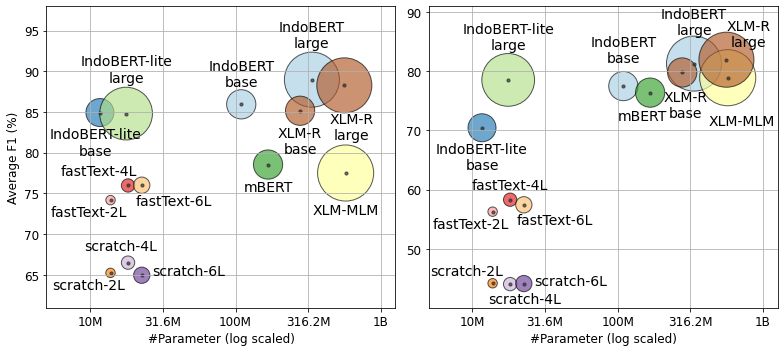

In [61]:
def get_offset(val, i):
    if i == 0:
        if val == 'fasttext-2L':
            return (-0.15, -2.0)
        if val == 'fasttext-4L':
            return (-0.2, 1.2)
        if val == 'fasttext-6L':
            return (0.22, -2.4)
        if val == 'scratch-2L':
            return (-0.15, -2.0)
        if val == 'scratch-4L':
            return (-0.05, 1.5)
        if val == 'scratch-6L':
            return (0.32, -0.0)
        if val == 'babert-base':
            return (-0.0, 2.25)
        if val == 'babert-lite-base':
            return (-0.03, -5.2)
        if val == 'bert-base-multilingual':
            return (-0.0, -3.3)
        if val == 'xlmr-base':
            return (-0.0, -5.2)
        if val == 'xlm-mlm':
            return (-0.0, -5.0)
        if val == 'babert-large':
            return (0.0, 4.0)
        if val == 'babert-lite-large':
            return (0.0, 3.9)
        if val == 'xlmr-large':
            return (0.05, -6.6)
        return (-0.5,1)
    else:
        if val == 'fasttext-2L':
            return (-0.15, -2.8)
        if val == 'fasttext-4L':
            return (0.0, 1.8)
        if val == 'fasttext-6L':
            return (0.21, -3.3)
        if val == 'scratch-2L':
            return (-0.18, 1.4)
        if val == 'scratch-4L':
            return (0.1, -3.2)
        if val == 'scratch-6L':
            return (0.32, -0.3)
        if val == 'babert-base':
            return (-0.0, 4)
        if val == 'babert-lite-base':
            return (0.0, -7.0)
        if val == 'bert-base-multilingual':
            return (-0.055, -4.7)
        if val == 'xlmr-base':
            return (0.025, -7.5)
        if val == 'xlm-mlm':
            return (0.1, -8.0)
        if val == 'babert-large':
            return (0.0, 5.0)
        if val == 'babert-lite-large':
            return (0.0, 5.1)
        if val == 'xlmr-large':
            return (0.15, 2.2)
        return (-0.5,1)

fig, axes = plt.subplots(ncols=2, figsize=(11,5))

anal_df = anal_df.sort_values('model')
for i, metric in enumerate(['f1 class', 'f1 seq']):
    ax = axes[i]
    anal_df['param'] = anal_df['params'].apply(get_size)
    anal_df['log_param'] = np.log10(anal_df['params'])
    anal_df['log_flop'] = np.log10(anal_df['flop'])
    anal_df['flop_size'] = anal_df['flop'].apply(get_size)

    ax = anal_df.plot.scatter(x='log_param', y=metric, s=anal_df['flop_size'], c=anal_df.index, colormap='Paired', 
                              edgecolors='black',  alpha=0.65, colorbar=False, ax=ax)
    anal_df.plot.scatter(x='log_param', y=metric, color='#2E2E2E', s=10, alpha=0.7, ax=ax)
    ax.set_ylim(anal_df[metric].min() - 4, anal_df[metric].max() + 9)
#     ax.set_ylim(48, 95)
    ax.set_xlim(6.7,9.1)

    # plt.title('Average F1 per Operation', fontsize=20)

    ax.set_xticks([7.0, 7.5, 8.0, 8.5, 9.0])
    ax.set_xticklabels(['10M','31.6M','100M','316.2M','1B'])
    if i == 0:
        ax.set_ylabel('Average F1 (%)', fontsize=12)
    else:
        ax.set_ylabel('', fontsize=12)
    ax.set_xlabel('#Parameter (log scaled)', fontsize=12)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    # Add Label
    label_point(anal_df['log_param'], anal_df[metric], anal_df['model'], get_offset, i, ax)

    # Draw
    ax.grid()
    plt.tight_layout()
    plt.savefig('f1_flop_param.png', bbox_inches='tight')

In [44]:
anal_df['flop_per_f1'] = anal_df['flop'] / anal_df['f1']
anal_df['param_per_f1'] = anal_df['param'] / anal_df['f1']

KeyError: 'f1'

In [ ]:
anal_df[['model','f1','flop_per_f1','param_per_f1']].sort_values('flop_per_f1')

In [ ]:
from transformers import BertForSequenceClassification, AlbertForSequenceClassification, XLMForSequenceClassification, XLMRobertaForSequenceClassification
from transformers import BertConfig, AlbertConfig, XLMConfig, XLMRobertaConfig

In [ ]:
x = BertForSequenceClassification(BertConfig())
print(
    1 if 'bert' in x.__dir__() else 0,
    1 if 'albert' in x.__dir__() else 0,
    1 if 'roberta' in x.__dir__() else 0,
    1 if 'transformer' in x.__dir__() else 0
)

In [ ]:
x = AlbertForSequenceClassification(AlbertConfig())
print(
    1 if 'bert' in x.__dir__() else 0,
    1 if 'albert' in x.__dir__() else 0,
    1 if 'roberta' in x.__dir__() else 0,
    1 if 'transformer' in x.__dir__() else 0
)

In [ ]:
x = XLMForSequenceClassification(XLMConfig())
print(
    1 if 'bert' in x.__dir__() else 0,
    1 if 'albert' in x.__dir__() else 0,
    1 if 'roberta' in x.__dir__() else 0,
    1 if 'transformer' in x.__dir__() else 0
)

In [ ]:
x = XLMRobertaForSequenceClassification(XLMRobertaConfig())
print(
    1 if 'bert' in x.__dir__() else 0,
    1 if 'albert' in x.__dir__() else 0,
    1 if 'roberta' in x.__dir__() else 0,
    1 if 'transformer' in x.__dir__() else 0
)